In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/age-detection-human-faces-18-60-years/age_detection.csv
/kaggle/input/age-detection-human-faces-18-60-years/test/51-60/29.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/51-60/28.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/51-60/26.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/51-60/27.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/51-60/25.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/31-40/29.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/31-40/28.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/31-40/26.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/31-40/27.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/31-40/25.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/21-30/29.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/21-30/28.jpg
/kaggle/input/age-detection-human-faces-18-60-years/test/21-30/26.jpg
/kaggle/input/age-de

#### Importing the important libraries

In [2]:
import tensorflow 
import keras 
from keras.layers import Dense,Flatten,BatchNormalization,Dropout
from keras.models import Model,Sequential 
from keras.preprocessing.image import ImageDataGenerator 
import matplotlib.pyplot as plt 
from keras.applications import ResNet50
from keras.callbacks import EarlyStopping
from keras.regularizers import L2,L1
from keras.optimizers import Adam
import cv2 
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### creating the resnet50 object in which we will add our own ANN layers

In [23]:
resnet=ResNet50(include_top=False,
    weights='imagenet',input_shape=(224,224,3))

#### Making the Layers trainable in the efnet model

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [5]:
print(len(resnet.layers))
resnet.layers

175


In [24]:
for i in resnet.layers:
    print(i.name,i.trainable)

input_2 True
conv1_pad True
conv1_conv True
conv1_bn True
conv1_relu True
pool1_pad True
pool1_pool True
conv2_block1_1_conv True
conv2_block1_1_bn True
conv2_block1_1_relu True
conv2_block1_2_conv True
conv2_block1_2_bn True
conv2_block1_2_relu True
conv2_block1_0_conv True
conv2_block1_3_conv True
conv2_block1_0_bn True
conv2_block1_3_bn True
conv2_block1_add True
conv2_block1_out True
conv2_block2_1_conv True
conv2_block2_1_bn True
conv2_block2_1_relu True
conv2_block2_2_conv True
conv2_block2_2_bn True
conv2_block2_2_relu True
conv2_block2_3_conv True
conv2_block2_3_bn True
conv2_block2_add True
conv2_block2_out True
conv2_block3_1_conv True
conv2_block3_1_bn True
conv2_block3_1_relu True
conv2_block3_2_conv True
conv2_block3_2_bn True
conv2_block3_2_relu True
conv2_block3_3_conv True
conv2_block3_3_bn True
conv2_block3_add True
conv2_block3_out True
conv3_block1_1_conv True
conv3_block1_1_bn True
conv3_block1_1_relu True
conv3_block1_2_conv True
conv3_block1_2_bn True
conv3_block1

In [7]:
for i in resnet.layers:
    if i.name.startswith("conv1_"):
        i.trainable=False
    else:
        i.trainable =True

In [8]:
for i in resnet.layers:
    print(i.name,i.trainable)

input_1 True
conv1_pad False
conv1_conv False
conv1_bn False
conv1_relu False
pool1_pad True
pool1_pool True
conv2_block1_1_conv True
conv2_block1_1_bn True
conv2_block1_1_relu True
conv2_block1_2_conv True
conv2_block1_2_bn True
conv2_block1_2_relu True
conv2_block1_0_conv True
conv2_block1_3_conv True
conv2_block1_0_bn True
conv2_block1_3_bn True
conv2_block1_add True
conv2_block1_out True
conv2_block2_1_conv True
conv2_block2_1_bn True
conv2_block2_1_relu True
conv2_block2_2_conv True
conv2_block2_2_bn True
conv2_block2_2_relu True
conv2_block2_3_conv True
conv2_block2_3_bn True
conv2_block2_add True
conv2_block2_out True
conv2_block3_1_conv True
conv2_block3_1_bn True
conv2_block3_1_relu True
conv2_block3_2_conv True
conv2_block3_2_bn True
conv2_block3_2_relu True
conv2_block3_3_conv True
conv2_block3_3_bn True
conv2_block3_add True
conv2_block3_out True
conv3_block1_1_conv True
conv3_block1_1_bn True
conv3_block1_1_relu True
conv3_block1_2_conv True
conv3_block1_2_bn True
conv3_bl

In [9]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

#### building the model using resnet50 

In [43]:
#building the model using resnet50 
model=Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(units=5,activation="softmax"))

#### creating generators for training data and validation data which includes data augmentation as well 

In [12]:
train=ImageDataGenerator(rotation_range=90,horizontal_flip=True,
                         width_shift_range=0.5,
    height_shift_range=0.4,shear_range=0.2,
    zoom_range=0.5,rescale=1./255)
valid=ImageDataGenerator(rescale=1./255) 

In [13]:
traing=train.flow_from_directory('/kaggle/input/age-detection-human-faces-18-60-years/train',
                                target_size=(224,224),class_mode="sparse",
                                batch_size=8)

Found 125 images belonging to 5 classes.


In [14]:
validg=valid.flow_from_directory('/kaggle/input/age-detection-human-faces-18-60-years/test',
                                target_size=(224,224),class_mode="sparse",
                                batch_size=8)

Found 25 images belonging to 5 classes.


#### using early stopping to reduce overfitting 

In [17]:
es=EarlyStopping(monitor="val_loss",min_delta=0.01,patience=3,start_from_epoch=4,verbose=1) 


#### compiling and training the model 

In [44]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(learning_rate=0.001),metrics="accuracy")

In [45]:
history=model.fit(traing,steps_per_epoch=125//8, epochs=10, validation_data=validg,
                  validation_steps=25//8,callbacks=[es]) 

Epoch 1/10
15/15 [==============================] - 48s 756ms/step - loss: 1.9133 - accuracy: 0.1368 - val_loss: 1.6115 - val_accuracy: 0.2083
Epoch 2/10
15/15 [==============================] - 12s 787ms/step - loss: 1.7069 - accuracy: 0.2051 - val_loss: 1.6107 - val_accuracy: 0.2500
Epoch 3/10
15/15 [==============================] - 11s 766ms/step - loss: 1.7092 - accuracy: 0.2137 - val_loss: 1.6089 - val_accuracy: 0.2500
Epoch 4/10
15/15 [==============================] - 12s 774ms/step - loss: 1.8368 - accuracy: 0.1709 - val_loss: 1.6097 - val_accuracy: 0.2083
Epoch 5/10
15/15 [==============================] - 11s 762ms/step - loss: 1.6947 - accuracy: 0.1880 - val_loss: 3.5597 - val_accuracy: 0.2083
Epoch 6/10
15/15 [==============================] - 12s 766ms/step - loss: 1.8090 - accuracy: 0.2393 - val_loss: 2.3715 - val_accuracy: 0.2500
Epoch 7/10
15/15 [==============================] - 11s 741ms/step - loss: 1.7597 - accuracy: 0.2308 - val_loss: 1.6099 - val_accuracy: 0.1250

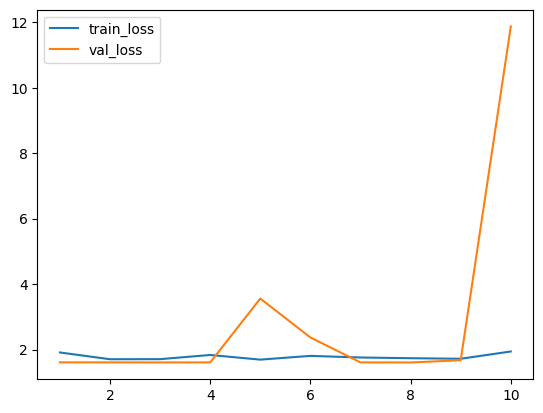

In [46]:
plt.plot(range(1,11),history.history["loss"],label="train_loss")
plt.plot(range(1,11),history.history["val_loss"],label="val_loss")
plt.legend()

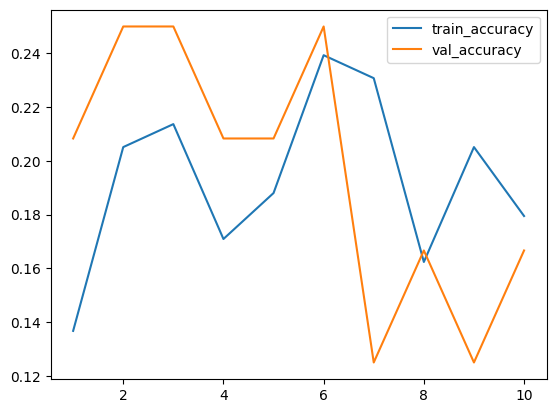

In [48]:
plt.plot(range(1,11),history.history["accuracy"],label="train_accuracy")
plt.plot(range(1,11),history.history["val_accuracy"],label="val_accuracy")
plt.legend()

#### making predictions 

In [49]:
predicted=model.predict(validg)
predicted 

4/4 [==============================] - 3s 495ms/step


array([[2.02214211e-01, 1.99704617e-01, 1.96687356e-01, 1.99438035e-01,
        2.01955795e-01],
       [1.61892176e-01, 8.81501436e-02, 3.95588100e-01, 1.60361648e-01,
        1.94007978e-01],
       [9.97128069e-01, 1.70674066e-05, 3.71274840e-36, 5.03516651e-17,
        2.85476865e-03],
       [1.14204034e-01, 3.76602858e-01, 2.59267747e-01, 1.23913348e-01,
        1.26012057e-01],
       [1.89948574e-01, 2.30355009e-01, 1.90037847e-01, 1.92454189e-01,
        1.97204381e-01],
       [2.40182772e-01, 2.14665279e-01, 1.78951502e-01, 1.40973628e-01,
        2.25226775e-01],
       [2.02149302e-01, 1.99679285e-01, 1.96698204e-01, 1.99423984e-01,
        2.02049255e-01],
       [2.02135593e-01, 1.99660659e-01, 1.96736634e-01, 1.99412987e-01,
        2.02054113e-01],
       [1.29004785e-13, 1.78797129e-21, 9.99988079e-01, 1.18816502e-27,
        1.19246697e-05],
       [2.01017886e-01, 2.01971740e-01, 1.94232315e-01, 1.99963823e-01,
        2.02814206e-01],
       [4.02194142e-01, 5.9004

In [50]:
predicted=np.argmax(predicted,axis=1)
predicted

array([0, 2, 0, 1, 1, 0, 0, 0, 2, 4, 1, 0, 2, 4, 1, 1, 4, 1, 4, 4, 1, 4,
       1, 4, 4])

#### evaluating the model 

accuracy_score :  0.24


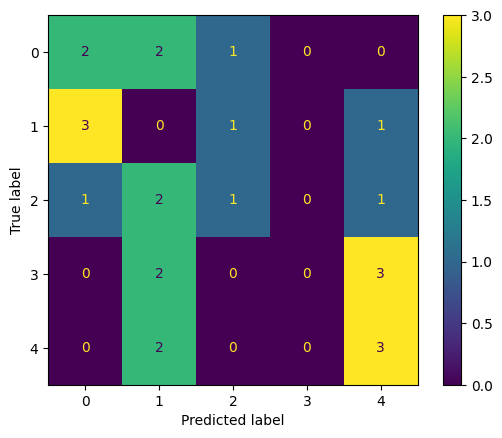

In [51]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix
print("accuracy_score : ",accuracy_score(validg.labels,predicted)) 
cm=confusion_matrix(validg.labels,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()

#### visualizing the output obtained at different convolutional layers

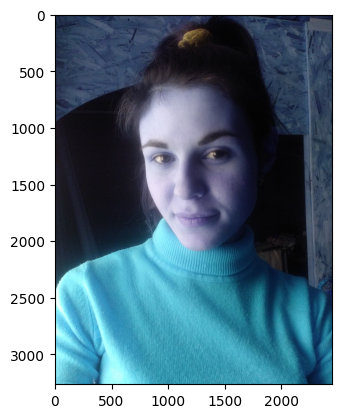

In [52]:
img=cv2.imread('/kaggle/input/age-detection-human-faces-18-60-years/train/18-20/10.jpg')
plt.imshow(img,cmap="gray")

In [53]:
img.shape

(3264, 2448, 3)

In [54]:
img=cv2.resize(img,(224,224))

In [55]:
img=img.reshape(1,224,224,3)## we have added batch size=1 here

In [56]:
model1=Model(inputs=resnet.layers[0].input,outputs=resnet.layers[1].output)

In [57]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)       0         
                                                                 
Total params: 0 (0.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
fm=model1.predict(img)

1/1 [==============================] - 0s 51ms/step


In [59]:
fm.shape

(1, 230, 230, 3)

In [60]:
len(cv2.split(fm[0]))

3

In [61]:
img2=(cv2.split(fm[0]))[0]

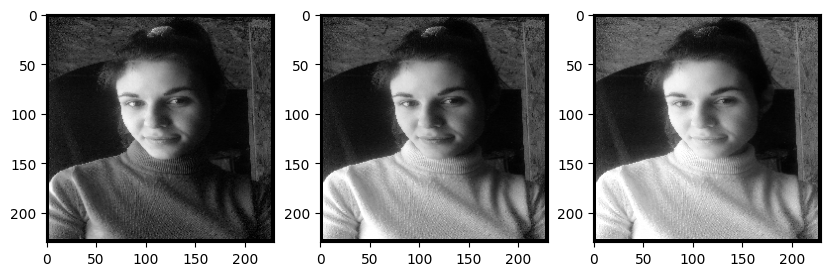

In [62]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow((cv2.split(fm[0]))[0],cmap="gray") 

plt.subplot(1,3,2)
plt.imshow((cv2.split(fm[0]))[1],cmap="gray") 


plt.subplot(1,3,3)
plt.imshow((cv2.split(fm[0]))[2],cmap="gray") 

In [63]:
model2=Model(inputs=resnet.layers[0].input,outputs=resnet.layers[6].output)

In [64]:
fm2=model2.predict(img)

1/1 [==============================] - 0s 71ms/step


In [65]:
fm2.shape

(1, 56, 56, 64)

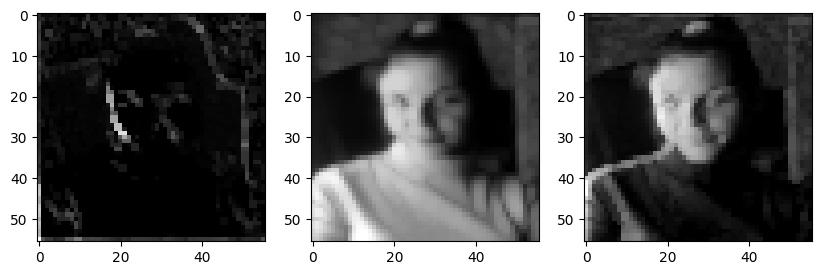

In [66]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow((cv2.split(fm2[0]))[0],cmap="gray") 

plt.subplot(1,3,2)
plt.imshow((cv2.split(fm2[0]))[1],cmap="gray") 


plt.subplot(1,3,3)
plt.imshow((cv2.split(fm2[0]))[2],cmap="gray") 

In [67]:
model3=Model(inputs=resnet.layers[0].input,outputs=resnet.layers[13].output)

In [68]:
fm3=model3.predict(img)

1/1 [==============================] - 0s 69ms/step


In [69]:
fm3.shape

(1, 56, 56, 256)

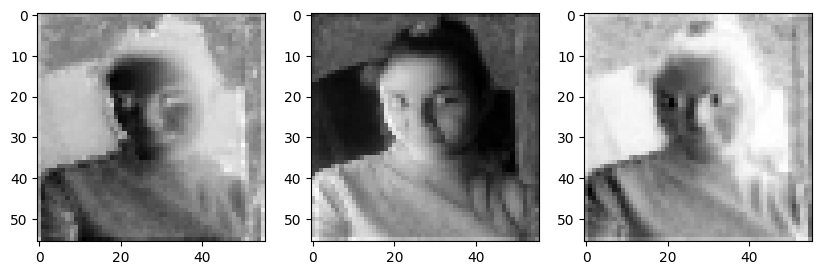

In [70]:
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
plt.imshow((cv2.split(fm3[0]))[0],cmap="gray") 

plt.subplot(1,3,2)
plt.imshow((cv2.split(fm3[0]))[1],cmap="gray") 


plt.subplot(1,3,3)
plt.imshow((cv2.split(fm3[0]))[2],cmap="gray") 